In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.ndimage.interpolation import rotate
from scipy.ndimage.filters import gaussian_filter1d, gaussian_filter
import numpy as np
import cv2


Implement a function that performs non-maximum suppression. You can leave it for the end

In [142]:
def nonmax_suppression(harris_resp, thr, halfwidth=2):
    """
    Inputs:
    1) harris_resp: input data, 2D array
    2) thr: threshold
    3) halfwidth: neighbouring pixels
    Outputs:
    1) cornersy: list with row coordinates of identified corner pixels.
    2) cornersx: list with respective column coordinates of identified corner pixels.
    Elements from the two lists with the same index must correspond to the same corner. 
    """
    cornersy = []
    cornersx = []
    h, w = im.shape[:2]
    for i in range(halfwidth, h-halfwidth):
        for j in range(halfwidth, w-halfwidth):
            if harris_resp[i][j]<thr:
                continue
            comp = harris_resp[i-halfwidth:i+halfwidth+1,j-halfwidth:j+halfwidth+1]
            if (harris_resp[i][j]>= comp).all():
                cornersx.append(j)
                cornersy.append(i)
    return cornersy, cornersx

Implement the main part of the exercise

In [158]:
# Define parameters
sigma_w = 2.0
sigma_d = 2.0
kappa = 0.04
rot_angle = 45
thresh =800

# Read the image
im = cv2.imread('../images/CircleLineRect.png', 0)
im = im.astype('float')

# Rotation of the image
if rot_angle != 0:
    im = rotate(im, rot_angle)

# TODO: Implement Harris corners
# Useful functions: gaussian_filter1d, gaussian_filter

I_x = gaussian_filter1d(im, sigma_d, order=0, axis=0)
I_x = gaussian_filter1d(I_x, sigma_d, order=1, axis=1)

I_y = gaussian_filter1d(im, sigma_d, order=0, axis=1)
I_y = gaussian_filter1d(I_y, sigma_d, order=1, axis=0)

A_11 = I_x ** 2
A_22 = I_y ** 2
A_12 = I_x * I_y

A_11 = gaussian_filter(A_11, sigma_w)
A_22 = gaussian_filter(A_22, sigma_w)
A_12 = gaussian_filter(A_12, sigma_w)

A_ij = np.array([[A_11, A_12], [A_12, A_22]])
trc = np.trace(A_ij)
det = np.multiply(A_11, A_22) - np.multiply(A_12, A_12)
H = det - kappa*trc**2
corn = nonmax_suppression(H,thresh,2)
# print(corn)

([2, 138, 138, 145, 205, 209, 211, 212, 212, 269, 288, 288, 421], [212, 220, 227, 108, 169, 44, 421, 2, 421, 105, 212, 218, 211])


Visualization of the results

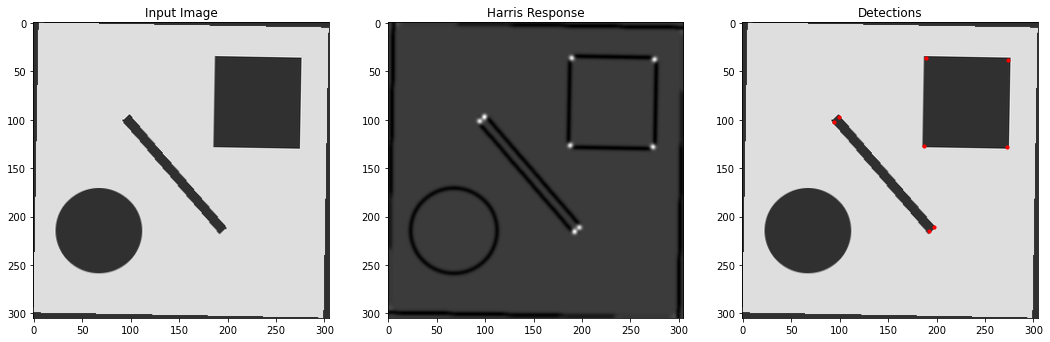

In [156]:
# Plotting of results
# No need to change it
plt.close("all")
plt.ion()
f, ax_arr = plt.subplots(1, 3, figsize=(18, 16))
ax_arr[0].set_title("Input Image")
ax_arr[1].set_title("Harris Response")
ax_arr[2].set_title("Detections")
ax_arr[0].imshow(im, cmap='gray')
ax_arr[1].imshow(H, cmap='gray')
ax_arr[2].imshow(im, cmap='gray')
ax_arr[2].scatter(x=corn[1], y=corn[0], c='r', s=10)